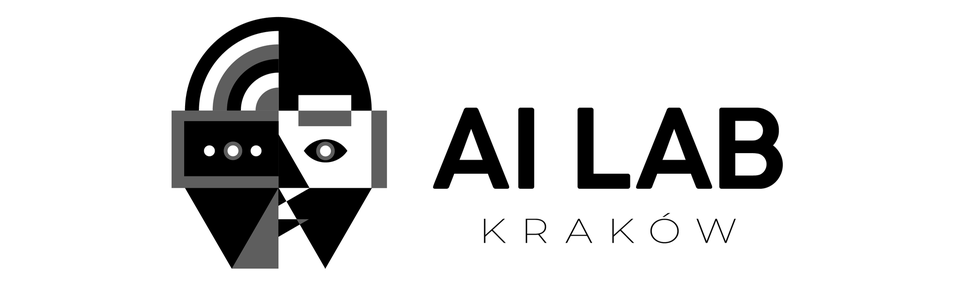

# AI Lab Recruitment Tasks
Dear Candidate,

We are pleased to inform you that you are about to begin the recruitment test for membership at AI Lab. Please ensure that you have a quiet space and all necessary materials before starting.

The test will assess your skills and suitability for the position, and it is expected to take approximately one week to complete. We encourage you to read the instructions carefully before proceeding.

To submit your solutions, you must fork the [AI_Lab_Recruitment_Tasks_2024](https://github.com/AI-LAB-AGH/AI_Lab_Recruitment_Tasks_2024) repository. Remember to make it private and add AI Lab members as collaborators: <a href="https://github.com/bjam24">bjam24</a> and <a href="https://github.com/BartekKruczek">BartekKruczek</a>.

Further information about this test may be available in the repository's README file.

If you encounter any issues during the test or have any additional questions, feel free to contact us at ailab@agh.edu.pl.

By participating in this recruitment, you agree to uphold the integrity of the process. In case of any dishonesty or attempts to cheat (e.g using ChatGPT, copying work), your candidacy will be **disqualified**, and your application will no longer be processed.

We wish you the best of luck and thank you for your interest in joining our team!

Best regards,

AI Lab Recruitment Team

## Task 1 - Classification

Using the  [Real / Fake Job Posting Prediction](https://www.kaggle.com/datasets/shivamb/real-or-fake-fake-jobposting-prediction)  dataset, create a machine learning model that classifies job postings as either real or fake. Your model should utilize both the text of the job descriptions and additional metadata features to achieve accurate predictions. You are encouraged to take any necessary steps in this task to obtain the best possible results. The more thorough and effective your approach, the more your effort will be appreciated.

In [ ]:
# comments are appreciated

## Task 2 - NLP

### Beginner

The dataset CENSUS-NER-Name-Email-Address-Phone is available at [Hugging Face](https://huggingface.co/datasets/Josephgflowers/CENSUS-NER-Name-Email-Address-Phone). Write a single regular expression that will find email addresses in various formats in the 'user' column, for example:
- user@domain.com
- user@domain.co.uk
- user123@domain.com
- user+tag@domain.com

Count the occurrences of domain names. Present the results in a bar chart. Solutions other than exclusively one regular expression will not be considered.

### Intermediate

Please take one pre-trained NLP model form HuggingFace (size of it is up to you). Your task is to make a promp with question about our University. Nest, pass 3-5 pages of English version of AGH students regulation and ask these questions again. Point is to detect anomalies (within answers) and see how model itself behave with long term memory. No fine-tuning required.

In [ ]:
# comments are appreciated

## Task 3 - Computer Vision

### Beginner
Take pre-trained model for imege classification (ex. MobileNetV2). Pick one image from the Internet (any you like), pre-proccess it, make it black and white instead of RGB, try to find out if the is some Gaussian noise (maybe get rid of it), pass to model and print top 5 classified classess of the image.

In [ ]:
# comments are appreciated

### Intermediate
Transfer learning on your own dataset. Take model ResNet50, load it using ML libraries. Find suitable dataset (can be no more than 2-3GB of images), you might want to use build in sets from sklearn. Load model, BUT WITH PARAMETER `include_top = False`. Build your own **small** NN to stack on top of ResNet50. Train combined models. Plotting results (whole training process; as well as metrics applied on valid and test set)would be nice :)

In [ ]:
# comments are appreciated